### Test 
- Calculate the ground-state energy of the $H_2$ molecule at various bond-lengths


In [1]:
import strayqat as sq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mol = sq.Molecule()
mol.geometry = [["H", [0, 0, 0]], ["H", [0, 0, 0.5]]]
mol.multiplicity = 1
mol.charge = 0

In [3]:
print(mol)

{'basis': 'sto-3g', 'multiplicity': 1, 'charge': 0, 'geometry': [['H', [0, 0, 0]], ['H', [0, 0, 0.5]]], 'n_active_electrons': None, 'n_active_orbitals': None}


In [4]:
# Full CI calculation
mol.run_scf()
print('FCI: %s[Hr]'% mol.fci_energy)
print('HF: %s[Hr]'% mol.hf_energy)

FCI: -1.0551597944706257[Hr]
HF: -1.042996274540095[Hr]


In [5]:
# CASCI calculation for CAS(2,2)
mol.n_active_electrons = 2
mol.n_active_orbitals = 2
mol.run_scf()
print('CASCI: %s[Hr]'% mol.fci_energy)

CASCI: -1.0551597944706232[Hr]


In [6]:
qubit_num = mol.n_qubits #qubit number
hamil = mol.hamiltonian  #hamiltonian


vqe = sq.Vqe()
# setup
vqe.n_qubit = qubit_num
vqe.maxiter = 100
vqe.gtol = 1e-6
vqe.depth = 6
vqe.method = 'BFGS' 
vqe.gpu = False
vqe.ansatz_type = 'SYMP'  # choose ansatz, 'HE'or'SYMP'(HE:Hardware Efficiency,SYMP:Symmetry Preserving)
vqe.hamiltonian = hamil
vqe.noise = False

print(vqe)

{'qubit': 4, 'depth': 6, 'ansatz': 'SYMP', 'maxiter': 100, 'gtol': 1e-06, 'noise': False}


In [7]:
# run VQE
vqe.run()
print('VQE: %s[Hr]'% vqe.cost_history[-1]) #FCI : -1.0551597944706257[Hr]

VQE: -1.0551597944706206[Hr]


In [8]:
# difference between the energy of Full CI energy and VQE 
print('E(VQE)-E(FCI)[Hr]=',vqe.cost_history[-1]-mol.fci_energy)

E(VQE)-E(FCI)[Hr]= 2.6645352591003757e-15


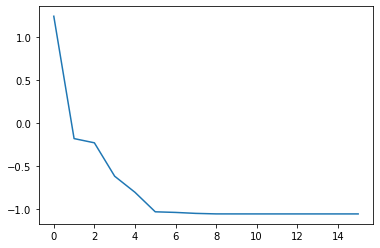

In [9]:
# iteration history
plt.plot(vqe.cost_history)